# Lecture 17

Last time, we looked at Numpy arrays, matplotlib, showing, reshaping an image dataset, and applying functions along an axis of a numpy array. 

Today:

* Slicing numpy arrays some more. An important difference between numpy arrays and lists.
* Histograms and matplotlib
* Randomness

<br>

In [1]:
# as always:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setting Values with Slicing

In [2]:
X = np.array(range(9)).reshape((3,3))

We already know the slicing notation:

In [3]:
X[:]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [4]:
X[:1]

array([[0, 1, 2]])

In [5]:
X[0:2,1:3]

array([[1, 2],
       [4, 5]])

We can also use it to set values:

In [6]:
X[:,1] = np.zeros([3])

In [7]:
X

array([[0, 0, 2],
       [3, 0, 5],
       [6, 0, 8]])

In [8]:
X[0:2,1:3] += 10

In [9]:
X

array([[ 0, 10, 12],
       [ 3, 10, 15],
       [ 6,  0,  8]])

### One important difference about slicing

In [10]:
xs = [0,1,2,3]
ys = xs[0:2]
ys[0] = 999
print(xs, ys)

[0, 1, 2, 3] [999, 1]


On the other hand, with numpy arrays:

In [11]:
X = np.array([0,1,2,3])
Y = X[0:2]
Y[0] = 999
print(X, Y)

[999   1   2   3] [999   1]


In lists, slicing always makes a fresh copy, whereas for numpy arrays, slicing makes a reference to that part of the array. This makes sense because if you have some huge dataset, you don't want to copy the whole dataset when you want to look at a slice of it. 

# Histogram

In [12]:
from scipy.ndimage import imread

In [13]:
G = imread("gauss.jpg")

In [14]:
G.shape

(765, 600, 3)

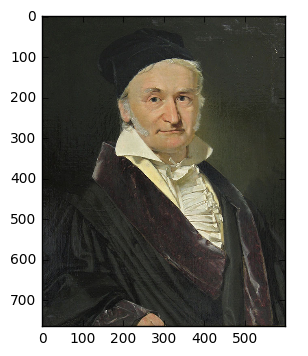

In [15]:
plt.imshow(G[:,:,:])


In [16]:
G_bw = np.apply_along_axis(func1d=np.mean, axis=2, arr=G)

In [17]:
G_bw.shape

(765, 600)

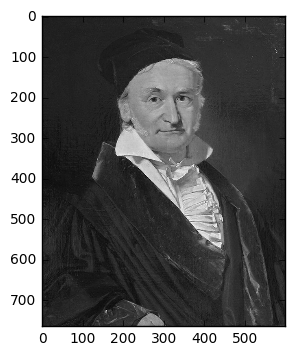

In [18]:
plt.imshow(G_bw, cmap="gray")

We want to see how much of each color (each shade of gray) there is in the above picture. One way to do this is to look at the histogram.

In [19]:
print(G_bw[:5,:5])

[[ 22.66666667  25.66666667  27.66666667  27.66666667  25.66666667]
 [ 32.66666667  34.66666667  36.66666667  35.66666667  32.66666667]
 [ 35.66666667  37.66666667  37.66666667  36.66666667  32.66666667]
 [ 33.66666667  34.66666667  35.66666667  33.66666667  30.66666667]
 [ 35.66666667  35.66666667  36.66666667  35.66666667  34.66666667]]


In [20]:
mi = np.min(G_bw)
mi

1.6666666666666667

Let's flatten and normalize the picture too:

In [21]:
G_bw.shape

(765, 600)

In [22]:
G_bw = G_bw.reshape((-1,))     # -1 means: "FIGURE IT OUT NUMPY!!!" 

In [23]:
G_bw.shape

(459000,)

This normalizes the data: the min is 0, the max is 1, and everything else is in between. 

In [24]:
G_bw = G_bw - np.min(G_bw)
G_bw = G_bw / np.max(G_bw)

In [25]:
print(G_bw[:10])

[ 0.08411215  0.09612817  0.10413885  0.10413885  0.09612817  0.09212283
  0.10413885  0.11615487  0.12416555  0.12016021]


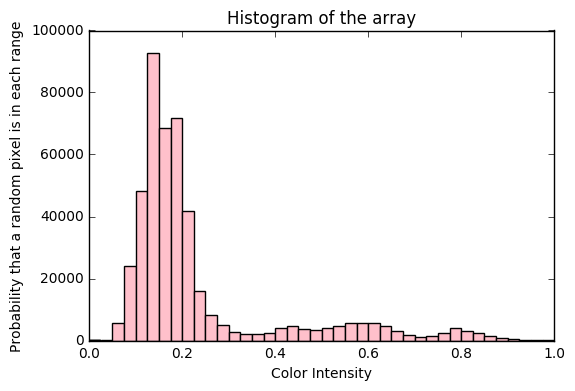

In [26]:
plt.xlabel('Color Intensity')
plt.ylabel('Probability that a random pixel is in each range')
plt.title("Histogram of the array")
n, bins, patches = plt.hist(G_bw, 40, facecolor='pink')